<a href="https://colab.research.google.com/github/ahmadAria001/PCVK_GANJIL_2024/blob/main/Week_5_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1jeH0PXvHxinuJaYdUx0c5hQfv--N8yVb?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io, color, filters
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
import glob
from math import sqrt, log10

In [65]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
dir = '/content/drive/MyDrive/Colab Notebooks/PCVK/Images/'


## Tugas Praktikum

### 1. Gamma Correction

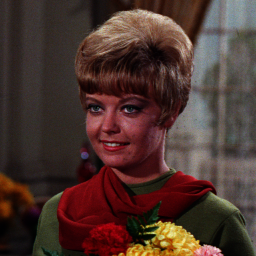

In [67]:
female_img = cv.imread(dir + 'female.tiff')
cv2_imshow(female_img)

In [68]:
def gamma_correction(img, gamma):
  # Normalize Image to [0,1]
  normalized = img / 255.0
  corrected = np.power(normalized, 1.0 / gamma)
  return np.uint8(corrected * 255)

 Gamma Correction on Image 
----------------------------------
Input Gamma Score: 4


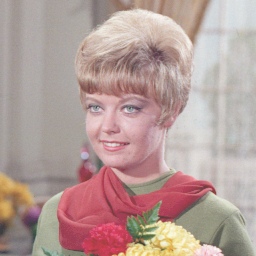

In [69]:
print(' Gamma Correction on Image ')
print('----------------------------------')
try:
  gamma = int(input('Input Gamma Score: '))
except ValueError:
  print('Error, not a number')

gamma_img = gamma_correction(female_img, gamma)
cv2_imshow(gamma_img)


### 2. Simulasi Depth Image

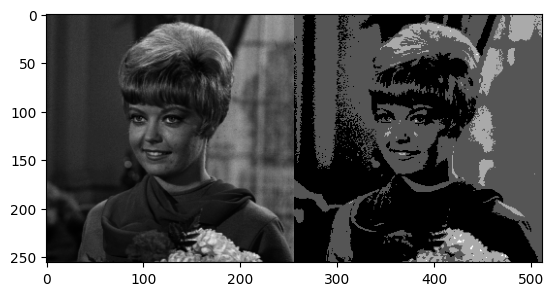

In [70]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread(dir + 'female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.round(original[y, x] / level) * level

frame = cv.hconcat([original, depth_image])
plt.imshow(frame, cmap='gray')

### 3. Modul Average Denoising

In [71]:
galaxy = cv.imread(dir + 'galaxy.jpg')

cv_img = []
for img in glob.glob(dir + 'noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

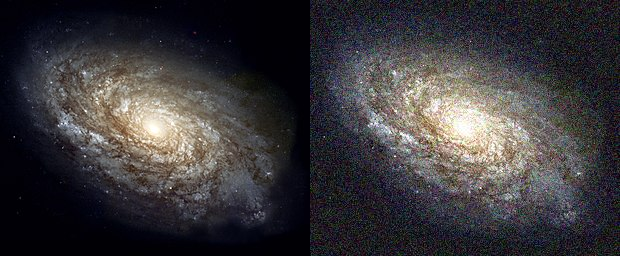

In [72]:
frame = cv.hconcat([galaxy,cv_img[0]])
cv2_imshow(frame)


In [73]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # PSNR is meaningless if MSE = 0 (Noiseless)
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

def image_averaging(list_img, total_image):
  avg_img = np.zeros(list_img[0].shape)
  for i in range(total_image):
    avg_img += list_img[i]

  avg_img /= total_image
  return avg_img

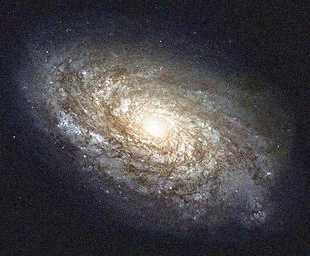

Amount of Image:  5
PSNR:  19.40529893884969


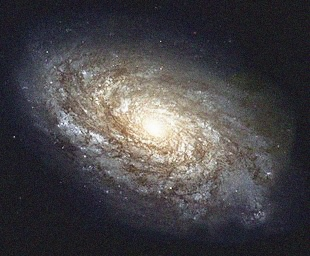

Amount of Image:  10
PSNR:  19.592990465370505


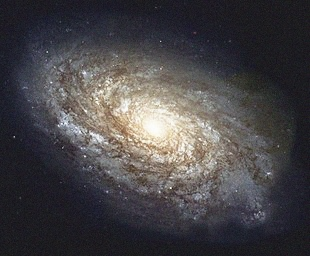

Amount of Image:  20
PSNR:  19.688334392135047


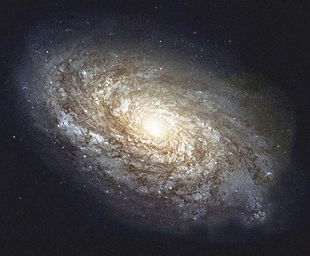

Amount of Image:  40
PSNR:  19.731163831796376


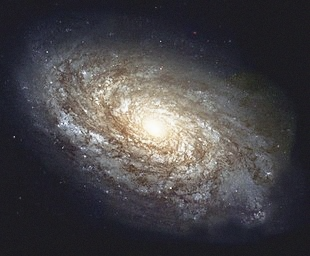

Amount of Image:  80
PSNR:  19.754825313809626


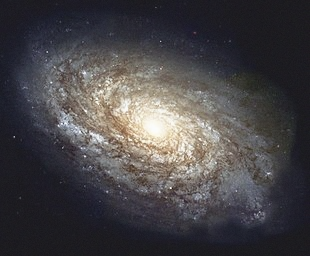

Amount of Image:  100
PSNR:  19.758317288501708


In [74]:
jumlah_citra = np.array([5,10,20,40,80,100])

list_denoised_image = []
for i in jumlah_citra:
  denoised_image = image_averaging(cv_img, i)
  list_denoised_image.append(denoised_image)
  cv2_imshow(denoised_image)
  print('Amount of Image: ', i)
  print('PSNR: ', PSNR(galaxy,denoised_image))

### 4. Image Masking

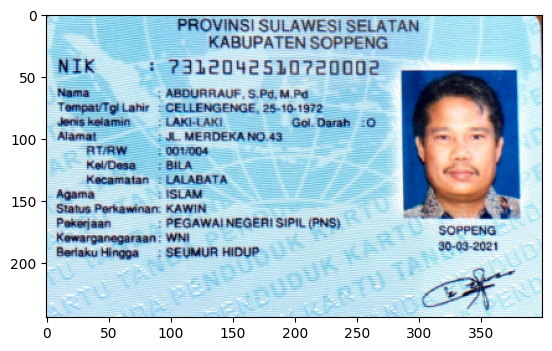

In [75]:
ktp = cv.imread(dir + 'KTP.png')
plt.imshow(cv.cvtColor(ktp,cv.COLOR_BGR2RGB))

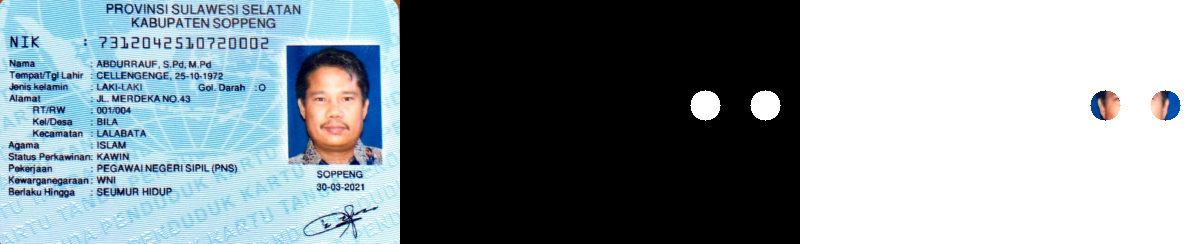

In [76]:
circle_mask = np.zeros(ktp.shape[:2], dtype="uint8")

cv.circle(circle_mask, (305, 105), 15, 255, -1)
cv.circle(circle_mask, (365, 105), 15, 255, -1)

# Inverse Mask (white into black and the opposite)
inverse_mask = cv.bitwise_not(circle_mask)

# Create Canvas
white_background = np.ones_like(ktp) * 255

# Circle Mask for The Image
ktp_and = cv.bitwise_and(ktp, ktp, mask=circle_mask)

# Black mask for the white part
white_part = cv.bitwise_and(white_background, white_background, mask=inverse_mask)

# Join the result with the white canves
final_result = cv.add(ktp_and, white_part)

frame = cv.hconcat([ktp,cv.cvtColor(circle_mask, cv.COLOR_GRAY2BGR),final_result])
cv2_imshow(frame)

### 5. Image Masking with other operator

##### Operator Logika NOT

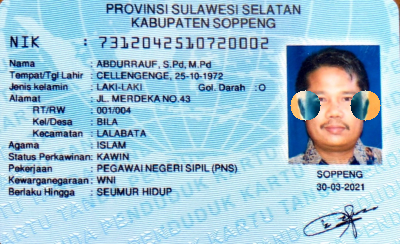

In [77]:
ktp_not = cv.bitwise_not(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_not)

##### Operator Logika OR

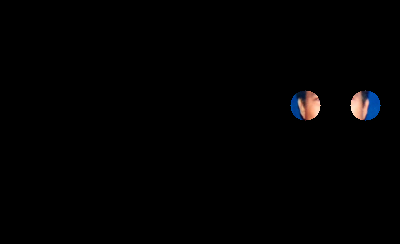

In [78]:
ktp_or = cv.bitwise_or(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_or)

##### Operator Logika AND

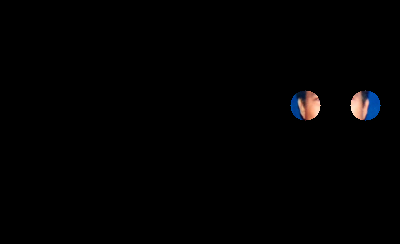

In [79]:
ktp_and = cv.bitwise_and(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_and)

##### Operator Logika NAND

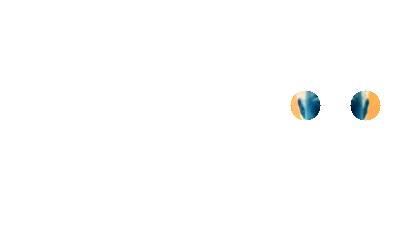

In [80]:
ktp_nand = cv.bitwise_not(cv.bitwise_and(ktp,ktp.copy(),mask=circle_mask))
cv2_imshow(ktp_nand)

##### Operator Logika XOR

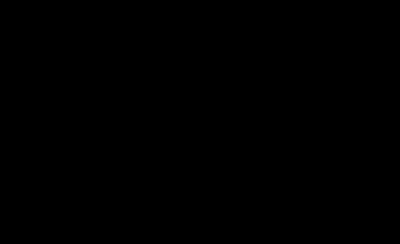

In [81]:
ktp_xor = cv.bitwise_xor(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_xor)